In [62]:
import numpy as np
import pandas as pd
from scipy import misc, linalg
from scipy.stats import skew
from __future__ import division
from numpy import matrix, linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Problem 1

In [2]:
mu1 = [0, 0, 0]
mu2 = [0, 0, 1]

sigma1 = [[1, 0.9, 0.9],[0.9, 1, 0.9],[0.9, 0.9, 1]]
sigma2 = [[1, 0.8, 0.8],[0.8, 1, 0.8],[0.8, 0.8, 1]]

label_1 = np.random.multivariate_normal(mu1, sigma1, 20)
label_2 = np.random.multivariate_normal(mu2, sigma2, 20)

###### 1

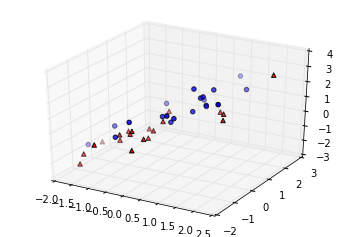

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(label_1[:, 0], label_1[:, 1], label_1[:, 2], c = 'r', marker = '^')
ax.scatter(label_2[:, 0], label_2[:, 1], label_2[:, 2], c = 'b', marker = 'o')
plt.show()

###### 2

In [32]:
mean_1 = label_1.mean(0)
mean_2 = label_2.mean(0)

sw = sum([np.dot((x - mean_1), (x-mean_1).T) for x in label_1]) + sum([np.dot((x - mean_2), (x-mean_2).T) for x in label_2])

w_star = (mean_1 - mean_2) / sw

In [28]:
print sw

101.314540242


In [31]:
print w_star

[-0.00590393 -0.00562327 -0.01333072]


In [43]:
# projection 1 is the projected vector of label_1
# projection 2 is the projected vector of label_2

projection_1 = np.dot(label_1, w_star)
projection_2 = np.dot(label_2, w_star)
print projection_1; projection_2

[-0.00447778  0.02901932  0.00469301 -0.02219828  0.03565624  0.0055382
 -0.06229352  0.01091749  0.0194424   0.01043238 -0.02010496 -0.02379763
  0.01144459  0.01849064  0.01307521  0.00988894  0.02266661 -0.00958982
  0.00689635  0.04437809]


array([-0.0267559 , -0.03834029,  0.01105158, -0.00935929, -0.01629643,
       -0.01444933,  0.00945063, -0.02945773, -0.04023049, -0.00325395,
       -0.01169935, -0.04854269, -0.02456853, -0.04427615, -0.02128238,
       -0.03601815, -0.03247367, -0.01504065,  0.03151704, -0.03468768])

###### 3

In [50]:
print label_1.shape

(20, 3)


### Problem 2

###### 2
Used the preprocessing given by the example from kaggle

In [58]:
train = pd.read_csv("kaggle-train.csv")
test = pd.read_csv("kaggle-test.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a191310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a2278d0>]], dtype=object)

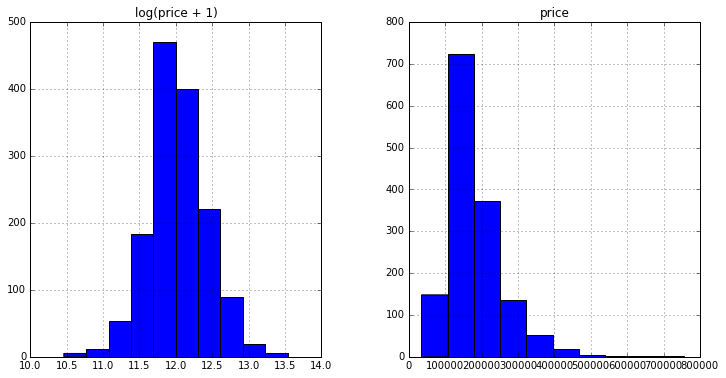

In [60]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [63]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [64]:
all_data = pd.get_dummies(all_data)

In [65]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [66]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [88]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.cross_validation import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="mean_squared_error", cv = 5))
    return(rmse)

In [68]:
model_ridge = Ridge()

### We will start our kaggle from here

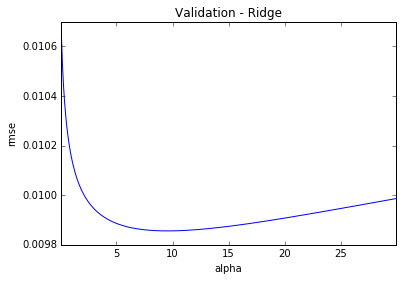

In [86]:
#This is the ridge cv for alpha in range of 0.1 and 30 with a 0.1 difference between each
#As we ccan see from the graph here, the alpha that gives the lowest rmse would be between 5 and 15 for ridge model
alphas = np.arange(0.1, 30, 0.1)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Ridge")
plt.xlabel("alpha")
plt.ylabel("rmse")

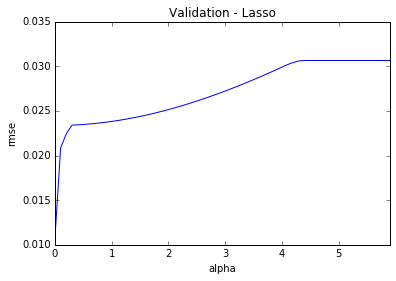

In [102]:
#This is the lasso cv for alpha in range of 0.1 and 30 with a 0.1 difference between each
#As we ccan see from the graph here, the alpha that gives the lowest rmse would be very close to zero
alphas = np.arange(0, 6, 0.1)
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Lasso")
plt.xlabel("alpha")
plt.ylabel("rmse")

[288, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/Users/Chris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':


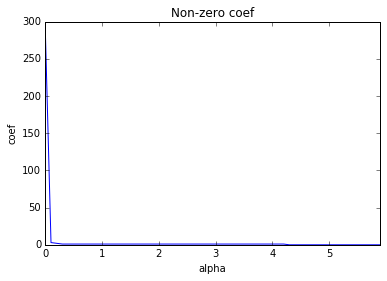

In [103]:
#This is the l zero norm of the coefs of the lasso model through different alphas
l_0 = [np.count_nonzero(Lasso(alpha).fit(X_train, y).coef_) for alpha in alphas]
print l_0
l_0 = pd.Series(l_0, index = alphas)
l_0.plot(title = "Non-zero coef")
plt.xlabel("alpha")
plt.ylabel("coef")

In [99]:
print l_0

[288, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
